# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

C:\Users\Zander\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [5]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

In [11]:
data.shape

(100, 2)

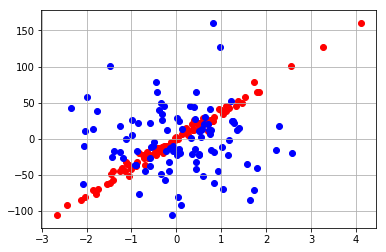

In [15]:
pylab.scatter([x[0] for x in data], target, color = 'r')
pylab.scatter([x[1] for x in data], target, color = 'b')
pylab.grid('True')

In [16]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [17]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [18]:
print(test_labels)

[-37.31870104 -71.3715844   39.70663436 -16.65927231 -21.47606913
 -36.69728864  12.67156468 -11.18242389  12.42286854  44.41658249
 -91.477377    17.64282734   4.45578287 -61.47026695  78.24817537
 -16.79027112 -15.01435792  -4.38652971 -17.27897399 -32.92158843
   0.34799656  22.13032804  12.47089016 -19.36956003 -12.0017312
 -36.44717565 -10.06708677 -45.27502383  -0.74051877 -80.80239408]


In [19]:
print(predictions)

[-35.12391625 -70.61781347  37.39692205 -14.81338088 -17.85773868
 -27.55723614  13.8950999  -13.14113814   6.70031321  43.94710982
 -93.06362866  21.76660969   8.76023896 -56.42345488  65.57764513
 -14.80339993  -9.49223346  -5.09161848 -13.48905217 -33.96900858
  -1.79487839  19.72423137  19.88645777 -31.97252257  -6.88577072
 -41.22248563 -10.2779639  -47.73323111   0.50668683 -78.08860493]


In [20]:
metrics.mean_absolute_error(test_labels, predictions)

3.7036310021760488

In [22]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [23]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [24]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [25]:
coef

array([ 38.07925837,   0.        ])

In [26]:
linear_regressor.coef_

array([ 38.05647778,   0.54378143])

In [27]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.46624905508356473

In [28]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [29]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.06*x1 + 0.54*x2 + -0.47


#### Lasso

In [30]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [31]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666398, std: 1.0170354384993354


In [33]:
print(lasso_regressor.coef_)

[ 37.32155247   0.        ]


In [34]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [43]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(lasso_regressor.coef_[0], 
                                                  lasso_regressor.coef_[1],
                                                  lasso_regressor.intercept_))

y = 37.32*x1 + 0.00*x2 + -0.36
